In [ ]:
# Data analysis and manipulation
import plotly.graph_objs as go # It allows you to create, go = detailed, customizable (low-level) plotting.
import plotly.io as pio # the input/output module of Plotly, pio= render, save, or export plots (like saving as .png, .jpg, .html).
import plotly.express as px # it's a high-level API built on top of graph_objs.
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Importing plotly
import plotly.offline as py
py.init_notebook_mode(connected=True) # connected=True means it will use Plotly’s online JavaScript library (CDN) to render charts. If you set connected=False, it uses a local copy of the JS library.


# Initializing Plotly
pio.renderers.default='colab' # it tells Plotly always use the Colab-friendly renderer


# Import Dataset 1

In [ ]:
# Importing Dataset
dataset1= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid dataset/covid.csv')
dataset1.head() # head() only controls rows, not columns. By default, it shows the first 5 rows.

Country/Region      Continent    Population  TotalCases  NewCases  \
0            USA  North America  3.311981e+08     5032179       NaN   
1         Brazil  South America  2.127107e+08     2917562       NaN   
2          India           Asia  1.381345e+09     2025409       NaN   
3         Russia         Europe  1.459409e+08      871894       NaN   
4   South Africa         Africa  5.938157e+07      538184       NaN   

   TotalDeaths  NewDeaths  TotalRecovered  NewRecovered  ActiveCases  \
0     162804.0        NaN       2576668.0           NaN    2292707.0   
1      98644.0        NaN       2047660.0           NaN     771258.0   
2      41638.0        NaN       1377384.0           NaN     606387.0   
3      14606.0        NaN        676357.0           NaN     180931.0   
4       9604.0        NaN        387316.0           NaN     141264.0   

   Serious,Critical  Tot Cases/1M pop  Deaths/1M pop  TotalTests  \
0           18296.0           15194.0          492.0  63139605.0   
1            8318.0           13716.0          464.0  13206188.0   
2            8944.0            1466.0           30.0  22149351.0   
3            2300.0            5974.0          100.0  29716907.0   
4             539.0            9063.0          162.0   3149807.0   

   Tests/1M pop      WHO Region iso_alpha  
0      190640.0        Americas       USA  
1       62085.0        Americas       BRA  
2       16035.0  South-EastAsia       IND  
3      203623.0          Europe       RUS  
4       53044.0          Africa       ZAF

In [ ]:

print(dataset1.shape) # Returning (rows, column)
print(dataset1.size)  # Return total element of dataset row X column= elements. In this case 209 X 17= 3553

(209, 17)
3553


In [ ]:
# return concise summary of dataframe
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
 16  iso_alpha         209 non-null    object 
dt

# Import Dataset 2

In [ ]:
# Importing dataset 2
dataset2= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid dataset/covid_grouped.csv')
dataset2.head()

Date Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0  2020-01-22    Afghanistan          0       0          0       0          0   
1  2020-01-22        Albania          0       0          0       0          0   
2  2020-01-22        Algeria          0       0          0       0          0   
3  2020-01-22        Andorra          0       0          0       0          0   
4  2020-01-22         Angola          0       0          0       0          0   

   New deaths  New recovered             WHO Region iso_alpha  
0           0              0  Eastern Mediterranean       AFG  
1           0              0                 Europe       ALB  
2           0              0                 Africa       DZA  
3           0              0                 Europe       AND  
4           0              0                 Africa       AGO

In [ ]:
# Return tuple of shape(rows, column)
print(dataset2.shape)

# Return size of dataframe
print(dataset2.size)

(35156, 11)
386716


In [ ]:
# Information about dataset 2
# Return concise summary of dataframe
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
 10  iso_alpha       35156 non-null  object
dtypes: int64(7), object(4)
memory usage: 3.0+ MB


In [ ]:
# column labels of dataset 1
dataset1.columns  # Only show the dataset1 column name

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'iso_alpha'],
      dtype='object')

In [ ]:
# Drop NewCases, NewDeaths, NewRecovered row from dataset 1
dataset1.drop(['NewCases', 'NewDeaths', 'NewRecovered'], axis=1, inplace=True)  # If inplace= True → modifies the original DataFrame directly
# axis=1 means only drop columns.

'''dataset1.drop([0,1], axis=0) # axis= 0 means rows → drops by indexing the first and second rows'''

# Select random set of values from dataset 1
dataset1.sample(5)

Country/Region      Continent  Population  TotalCases  TotalDeaths  \
92      Mauritania         Africa   4660728.0        6444        157.0   
71     Ivory Coast         Africa  26437950.0       16447        103.0   
107      Hong Kong           Asia   7503041.0        3850         46.0   
138        Liberia         Africa   5068618.0        1224         78.0   
115           Cuba  North America  11325899.0        2775         88.0   

     TotalRecovered  ActiveCases  Serious,Critical  Tot Cases/1M pop  \
92           5291.0        996.0               3.0            1383.0   
71          12484.0       3860.0               NaN             622.0   
107          2458.0       1346.0              39.0             513.0   
138           705.0        441.0               NaN             241.0   
115          2409.0        278.0               4.0             245.0   

     Deaths/1M pop  TotalTests  Tests/1M pop      WHO Region iso_alpha  
92            34.0     57387.0       12313.0          Africa       MRT  
71             4.0    104584.0        3956.0          Africa            
107            6.0    692430.0       92287.0  WesternPacific       HKG  
138           15.0         NaN           NaN          Africa       LBR  
115            8.0    285471.0       25205.0        Americas       CUB

#  Creating table using plotly express

In [ ]:
# Import create_table Figure factory
from plotly.figure_factory import create_table
colorscale=[[0, '#4d004c'], [0.5, '#f2e5ff'], [1,'#ffffff']]  # [position, color] 0= lowest, 1= highest;
table= create_table(dataset1.head(15), colorscale= colorscale)
py.iplot(table)   # py.iplot() is the offline plotting function for Plotly
#It renders the table inside the notebook rather than opening a separate browser window.

# Bar graphs- Comparisons between COVID infected countries in terms of total cases, total deaths & total tests

In [ ]:
# It draws a colored bar chart of the top 15 countries and their total cases. color= TotalCases
px.bar(dataset1.head(15),
       x= 'Country/Region',
       y= 'TotalCases',
       color='TotalCases',
       height=500,
       hover_data=['Country/Region', 'Continent'])  # When you move your mouse over a bar in the bar chart, a small tooltip (hover box) pops up.

In [ ]:
# It draws a colored bar chart of the top 15 countries and their total cases. color= TotalDeaths
px.bar(dataset1.head(15),
         x='Country/Region',
         y='TotalCases',
         color='TotalDeaths',
         height=500,
         hover_data=['Country/Region', 'Continent'])


In [ ]:
# It draws a colored bar chart of the top 15 countries and their total cases. color= TotalTest
px.bar(dataset1.head(15),
       x= 'Country/Region',
       y='TotalCases',
       color= 'TotalTests',
       height=500,
       hover_data= ['Country/Region', 'Continent'])

In [ ]:
# It's a horizontal bar chart (bars go left–right, not up–down). where x= TotalTests, y= Country/Region
px.bar(dataset1.head(15),
       x= 'TotalTests',
       y='Country/Region',
       orientation='h',
       height=500,
       color='TotalTests',
       hover_data=['Country/Region', 'Continent'])

In [ ]:

# Same orientation, x= TotalTests but y= Continent here
px.bar(dataset1.head(15),
       x='TotalTests',
       y='Continent',
       orientation='h',
       color='TotalTests',
       height=500,
       hover_data=['Country/Region', 'Continent'])

# Data Visualization through Bubble Charts-Continent Wise

In [ ]:
# It draws a colored Scatter chart and their total cases. color= TotalCases
px.scatter(dataset1,
           x='Continent',
           y='TotalCases',
           color='TotalCases',
           size='TotalCases',     # The size of each bubble is proportional to the total cases (big bubble = more cases).
           hover_data=['Country/Region', 'Continent'],
           size_max=80)   # The largest bubble will have a maximum size of 80

In [ ]:
# It draws a colored Scatter chart and their total cases. color= TotalCases
px.scatter(dataset1.head(57),
           x='Continent',
           y='TotalCases',
           color='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           size='TotalCases',
           size_max=80, log_y= True)

In [ ]:
px.scatter(dataset1.head(54),
           x='Continent',
           y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests',
           size='TotalTests', size_max=80)


In [ ]:
px.scatter(dataset1.head(50),
           x='Continent',
           y='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           color='TotalTests', size='TotalTests', size_max=80, log_y= True)


# Data Visualization through Bubble Charts-Country Wise

In [ ]:
px.scatter(dataset1.head(100),
           x='Country/Region',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='TotalCases',
           size='TotalCases', size_max=80)

In [ ]:
px.scatter(dataset1.head(30),
           x='Country/Region',
           y='TotalCases',
           hover_data=['Country/Region', 'Continent'],
           color='Country/Region', size='TotalCases', size_max=80, log_y= True )

In [ ]:
px.scatter(dataset1.head(10), x='Country/Region',
           y='TotalDeaths',
           color='Country/Region', hover_data=['Country/Region', 'Continent'],
           size='TotalDeaths', size_max=80)

In [ ]:
px.scatter(dataset1.head(30),
           x='Country/Region',
           y='Tests/1M pop',    # The y-axis shows the number of tests conducted per 1 million population.
           color= 'Country/Region',
           hover_data=['Country/Region', 'Continent'],
           size='Tests/1M pop', size_max= 80)

In [ ]:
px.scatter(dataset1.head(30), x='Country/Region',
           y='Tests/1M pop',
           color='Tests/1M pop',
           hover_data=['Country/Region', 'Continent'],
           size='Tests/1M pop', size_max= 80)

In [ ]:
px.scatter(dataset1.head(30), x='TotalCases',
           y= 'TotalDeaths',
           color='TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           size='TotalDeaths',
           size_max=80)

In [ ]:
px.scatter(dataset1.head(30), x='TotalCases',
           y='TotalDeaths',
           color='TotalDeaths',
           hover_data=['Country/Region', 'Continent'],
           size='TotalDeaths',
           size_max=80,
           log_x=True, log_y=True)

In [ ]:
from re import T
px.scatter(dataset1.head(30), x='TotalTests',
           y='TotalCases',
           color='TotalTests',
           hover_data=['Country/Region', 'Continent'],
           size='TotalTests', size_max=80,
           log_x=True, log_y= True)

#Advanced Data Visualization- Bar graphs for All top infected Countries

In [ ]:
px.bar(dataset2, x='Date', y='Confirmed',
       color='Confirmed',
       hover_data=['Confirmed', 'Date', 'Country/Region'],
       height=400)

In [ ]:
# y=Confirmed, Color= Confirmed
px.bar(dataset2, x='Date', y='Confirmed',
       color='Confirmed',
       hover_data=['Confirmed', 'Date', 'Country/Region'],
       log_y=True, height=400)

In [ ]:
# y= Deaths, Color= Deaths
px.bar(dataset2, x='Date', y='Deaths', color='Deaths',
       hover_data=['Confirmed', 'Date', 'Country/Region'],
       log_y=False, height=400)

# Countries Specific COVID Data Visualization: (United States)

In [ ]:
df_US= dataset2.loc[dataset2['Country/Region']=='US']
df_US

Date Country/Region  Confirmed  Deaths  Recovered   Active  \
173    2020-01-22             US          1       0          0        1   
360    2020-01-23             US          1       0          0        1   
547    2020-01-24             US          2       0          0        2   
734    2020-01-25             US          2       0          0        2   
921    2020-01-26             US          5       0          0        5   
...           ...            ...        ...     ...        ...      ...   
34394  2020-07-23             US    4038816  144430    1233269  2661117   
34581  2020-07-24             US    4112531  145560    1261624  2705347   
34768  2020-07-25             US    4178970  146465    1279414  2753091   
34955  2020-07-26             US    4233923  146935    1297863  2789125   
35142  2020-07-27             US    4290259  148011    1325804  2816444   

       New cases  New deaths  New recovered WHO Region iso_alpha  
173            0           0              0   Americas       USA  
360            0           0              0   Americas       USA  
547            1           0              0   Americas       USA  
734            0           0              0   Americas       USA  
921            3           0              0   Americas       USA  
...          ...         ...            ...        ...       ...  
34394      68695        1114          22420   Americas       USA  
34581      73715        1130          28355   Americas       USA  
34768      66439         905          17790   Americas       USA  
34955      54953         470          18449   Americas       USA  
35142      56336        1076          27941   Americas       USA  

[188 rows x 11 columns]

In [ ]:
px.bar(df_US, x='Date', y='Confirmed', color='Confirmed', height= 400)

In [ ]:
px.bar(df_US, x= 'Date', y='Recovered', color='Recovered', height=400)

In [ ]:
px.line(df_US,x='Date', y='Recovered', height=400 )

In [ ]:
px.line(df_US, x='Date', y='Confirmed', height=400)

In [ ]:
px.line(df_US, x= 'Date', y='New cases', height=400)

In [ ]:
px.bar(df_US, x='Date', y='New cases', height=400)

In [ ]:
px.scatter(df_US, x='Confirmed', y='Deaths', height=400)

#Visualization of Data in terms of Maps

In [ ]:
'''A choropleth map is a geographic map where areas (like countries) are colored based on the value
of a data variable (in this case, COVID-19 confirmed cases).'''

px.choropleth(dataset2,
              locations= 'iso_alpha',
              color='Confirmed',
              hover_name='Country/Region',
              color_continuous_scale= 'Blues',
              animation_frame='Date')

In [ ]:
# Creating Map
px.choropleth(dataset2,
              locations='iso_alpha',
              color='Deaths',
              hover_name='Country/Region',
              color_continuous_scale='Viridis',   #'Viridis' is a perceptually uniform color scale that ranges from dark purple (low values) to bright yellow (high values).
              animation_frame='Date')

In [ ]:
# Natural earth projection
px.choropleth(dataset2, locations='iso_alpha',
              color='Recovered',
              hover_name='Country/Region',
              color_continuous_scale='RdYlGn',
              projection='natural earth',
              animation_frame='Date')

In [ ]:
# Bar graph animation
px.bar(dataset2, x='WHO Region',
       y='Confirmed',
       color='WHO Region',
       animation_frame='Date', hover_name='Country/Region')

# Visualize text using Word Cloud
Dataset3: This dataset contains real world examples of number of Covid-19 deaths and the reasons behind the deaths.

In [ ]:
#  Importing dataset
dataset3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/covid dataset/coviddeath.csv')
dataset3.head()

Data as of  Start Week    End Week State       Condition Group  \
0  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
1  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
2  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
3  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   
4  08/30/2020  02/01/2020  08/29/2020    US  Respiratory diseases   

                 Condition ICD10_codes Age Group  Number of COVID-19 Deaths  \
0  Influenza and pneumonia     J09-J18      0-24                      122.0   
1  Influenza and pneumonia     J09-J18     25-34                      596.0   
2  Influenza and pneumonia     J09-J18     35-44                     1521.0   
3  Influenza and pneumonia     J09-J18     45-54                     4186.0   
4  Influenza and pneumonia     J09-J18     55-64                    10014.0   

  Flag  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [ ]:
# Dataset information
dataset3.tail()

Data as of  Start Week    End Week State           Condition Group  \
12255  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12256  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12257  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12258  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   
12259  08/30/2020  02/01/2020  08/29/2020    YC  Coronavirus Disease 2019   

      Condition ICD10_codes   Age Group  Number of COVID-19 Deaths  \
12255  COVID-19        U071       65-74                     5024.0   
12256  COVID-19        U071       75-84                     5381.0   
12257  COVID-19        U071         85+                     4841.0   
12258  COVID-19        U071  Not stated                        NaN   
12259  COVID-19        U071    All ages                    20628.0   

                                  Flag  
12255                              NaN  
12256                              NaN  
12257                              NaN  
12258  Counts less than 10 suppressed.  
12259                              NaN

In [ ]:
print(dataset3.columns)

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'Number of COVID-19 Deaths',
       'Flag'],
      dtype='object')


In [ ]:
# Getting dataset information
dataset3.groupby(["Condition"]).count()   # how many row exist for each condition

Data as of  Start Week  \
Condition                                                                    
Adult respiratory distress syndrome                        540         540   
All other conditions and causes (residual)                 540         540   
Alzheimer disease                                          530         530   
COVID-19                                                   540         540   
Cardiac arrest                                             520         520   
Cardiac arrhythmia                                         540         540   
Cerebrovascular diseases                                   530         530   
Chronic lower respiratory diseases                         540         540   
Diabetes                                                   540         540   
Heart failure                                              540         540   
Hypertensive diseases                                      540         540   
Influenza and pneumonia                                    540         540   
Intentional and unintentional injury, poisoning...         520         520   
Ischemic heart disease                                     540         540   
Malignant neoplasms                                        540         540   
Obesity                                                    530         530   
Other diseases of the circulatory system                   530         530   
Other diseases of the respiratory system                   540         540   
Renal failure                                              540         540   
Respiratory arrest                                         480         480   
Respiratory failure                                        540         540   
Sepsis                                                     530         530   
Vascular and unspecified dementia                          530         530   

                                                    End Week  State  \
Condition                                                             
Adult respiratory distress syndrome                      540    540   
All other conditions and causes (residual)               540    540   
Alzheimer disease                                        530    530   
COVID-19                                                 540    540   
Cardiac arrest                                           520    520   
Cardiac arrhythmia                                       540    540   
Cerebrovascular diseases                                 530    530   
Chronic lower respiratory diseases                       540    540   
Diabetes                                                 540    540   
Heart failure                                            540    540   
Hypertensive diseases                                    540    540   
Influenza and pneumonia                                  540    540   
Intentional and unintentional injury, poisoning...       520    520   
Ischemic heart disease                                   540    540   
Malignant neoplasms                                      540    540   
Obesity                                                  530    530   
Other diseases of the circulatory system                 530    530   
Other diseases of the respiratory system                 540    540   
Renal failure                                            540    540   
Respiratory arrest                                       480    480   
Respiratory failure                                      540    540   
Sepsis                                                   530    530   
Vascular and unspecified dementia                        530    530   

                                                    Condition Group  \
Condition                                                             
Adult respiratory distress syndrome                             540   
All other conditions and causes (residual)                      540   
Alzheimer disease                        

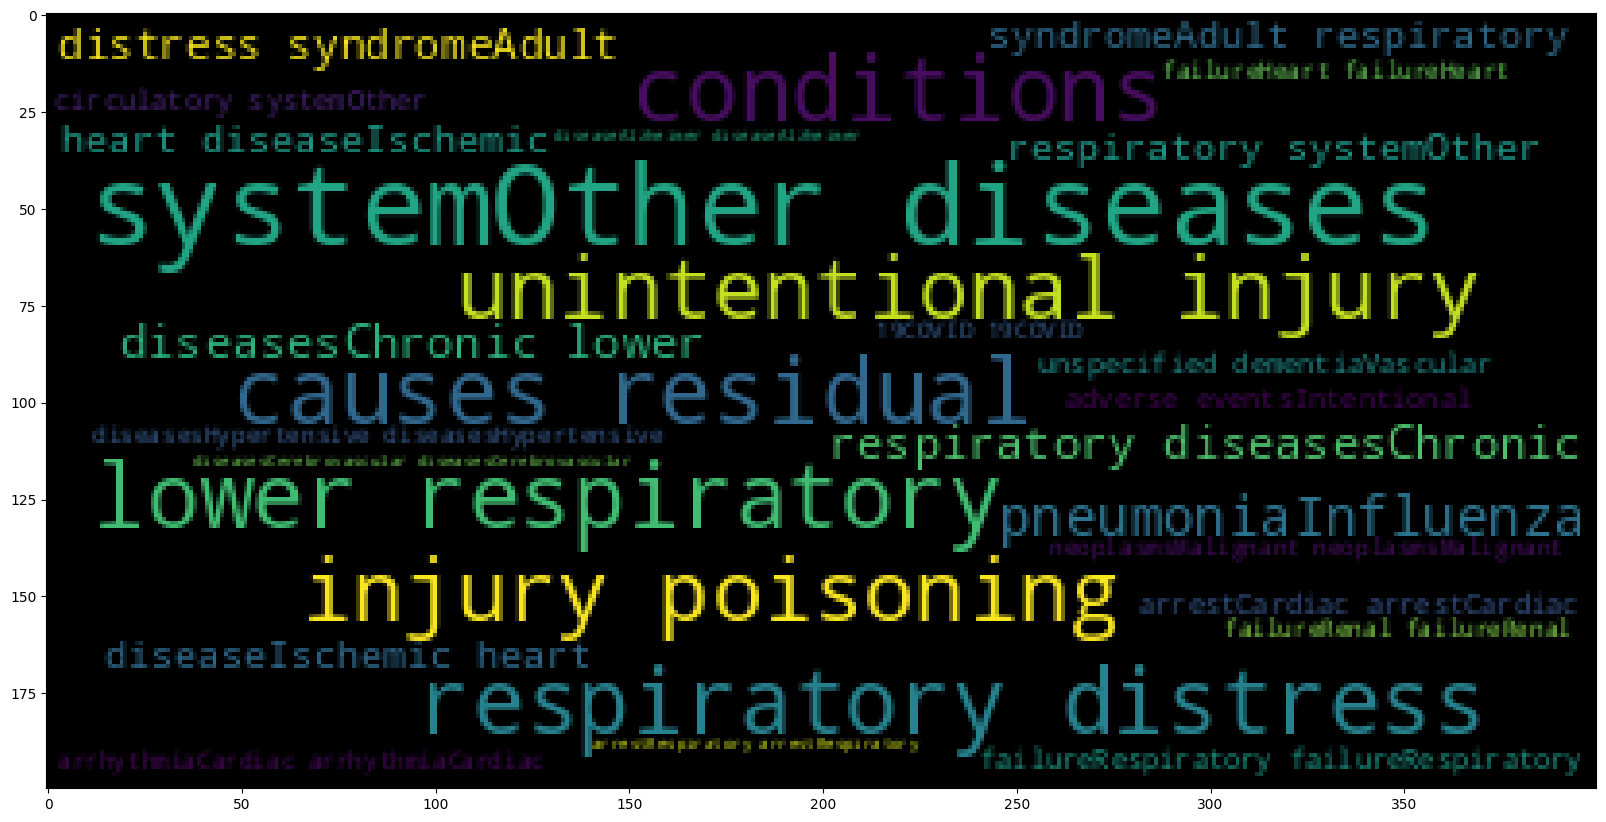

In [ ]:
# Creating wordcloud

# import word cloud
from wordcloud import WordCloud   # This class is used to generate word cloud images — graphical representations where more frequent words appear larger.
sentences= dataset3['Condition'].tolist()   # You're selecting the 'Condition' column from the DataFrame. .tolist() converts this column into a Python list.
sentences_as_a_string= ''.join(sentences)

# Convert the string into World Cloud
plt.figure(figsize=(20, 20))
plt.imshow(WordCloud().generate(sentences_as_a_string))

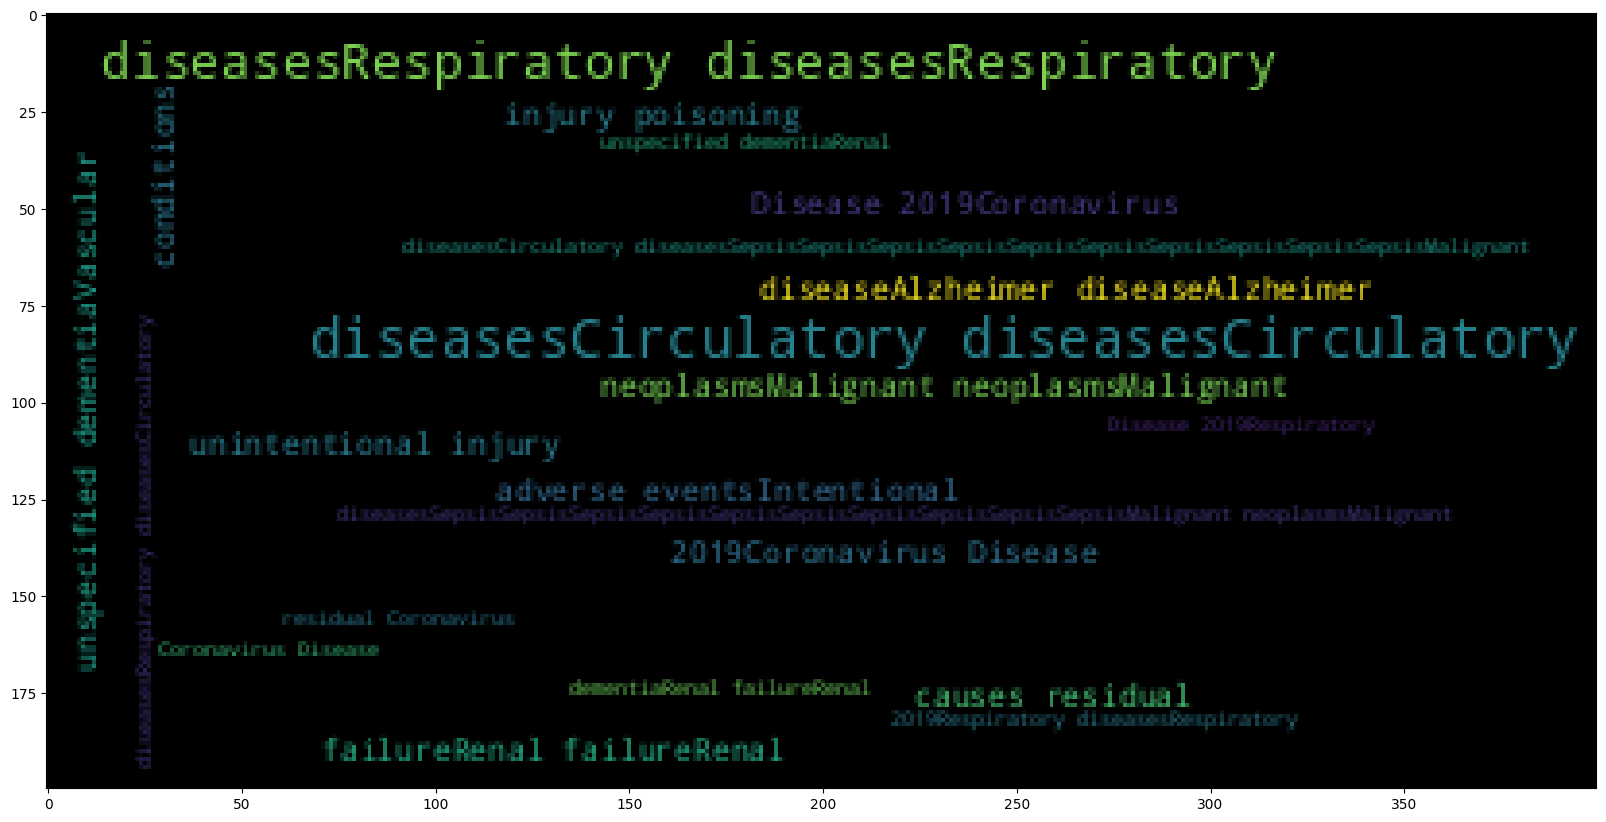

In [ ]:
# Creating wordcloud
column2_tolist= dataset3['Condition Group'].tolist()


# Convert the list to one single String
column_to_string=''.join(column2_tolist)

# Convert the string into WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(column_to_string))